--2024-11-27 20:33:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-27 20:33:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-27 20:33:43--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

Filter:   0%|          | 0/416809 [00:00<?, ? examples/s]

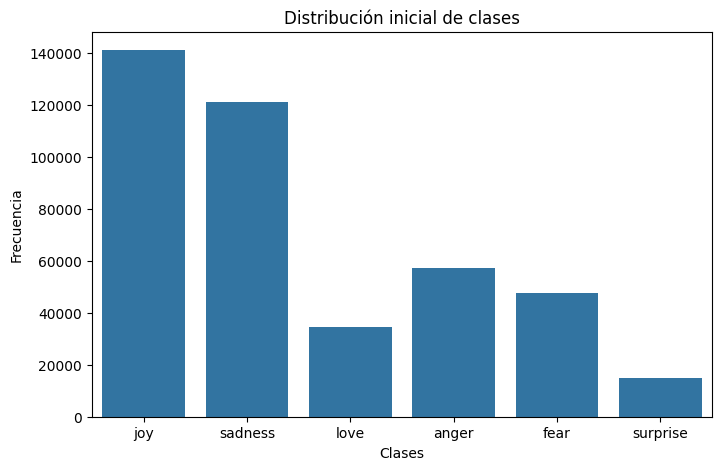

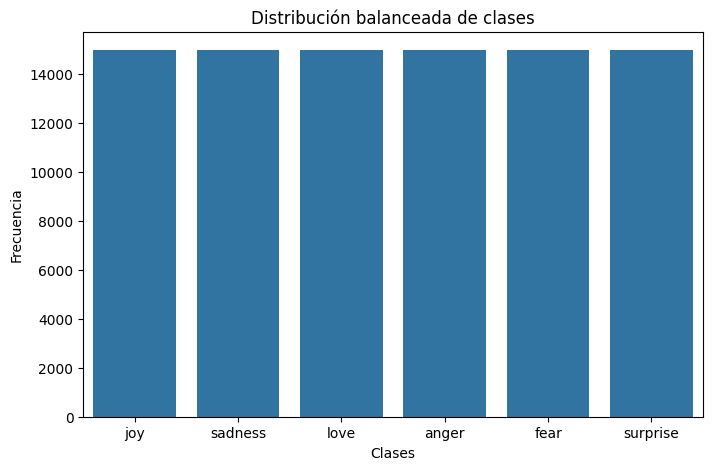

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
983/983 ━━━━━━━━━━━━━━━━━━━━ 55s 51ms/step - accuracy: 0.5343 - loss: 1.2046 - val_accuracy: 0.8582 - val_loss: 0.4186 - learning_rate: 3.0000e-04
Epoch 2/15
983/983 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.8712 - loss: 0.3866 - val_accuracy: 0.9127 - val_loss: 0.2522 - learning_rate: 3.0000e-04
Epoch 3/15
983/983 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.9155 - loss: 0.2449 - val_accuracy: 0.9261 - val_loss: 0.2068 - learning_rate: 3.0000e-04
Epoch 4/15
983/983 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.9290 - loss: 0.1938 - val_accuracy: 0.9306 - val_loss: 0.1875 - learning_rate: 3.0000e-04
Epoch 5/15
983/983 ━━━━━━━━━━━━━━━━━━━━ 86s 47ms/step - accuracy: 0.9378 - loss: 0.1633 - val_accuracy: 0.9360 - val_loss: 0.1699 - learning_rate: 3.0000e-04
Epoch 6/15
983/983 ━━━━━━━━━━━━━━━━━━━━ 78s 44ms/step - accuracy: 0.9435 - loss: 0.1449 - val_accuracy: 0.9393 - val_loss: 0.1533 - learning_rate: 3.0000e-04
Epoch 7/15
983/983 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/ste

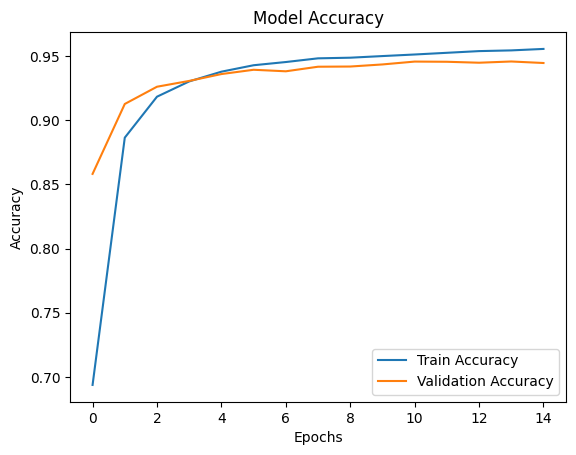

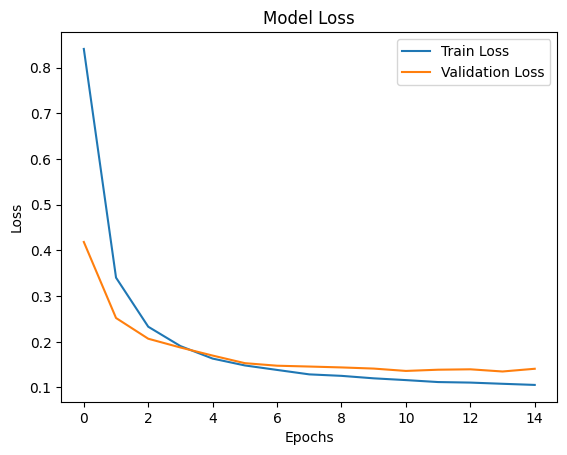

422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step
              precision    recall  f1-score   support

         joy       0.98      0.90      0.94      2228
     sadness       0.98      0.93      0.95      2204
        love       0.93      0.99      0.96      2346
       anger       0.95      0.94      0.95      2260
        fear       0.92      0.91      0.91      2297
    surprise       0.91      0.99      0.95      2140

    accuracy                           0.95     13475
   macro avg       0.95      0.95      0.95     13475
weighted avg       0.95      0.95      0.94     13475



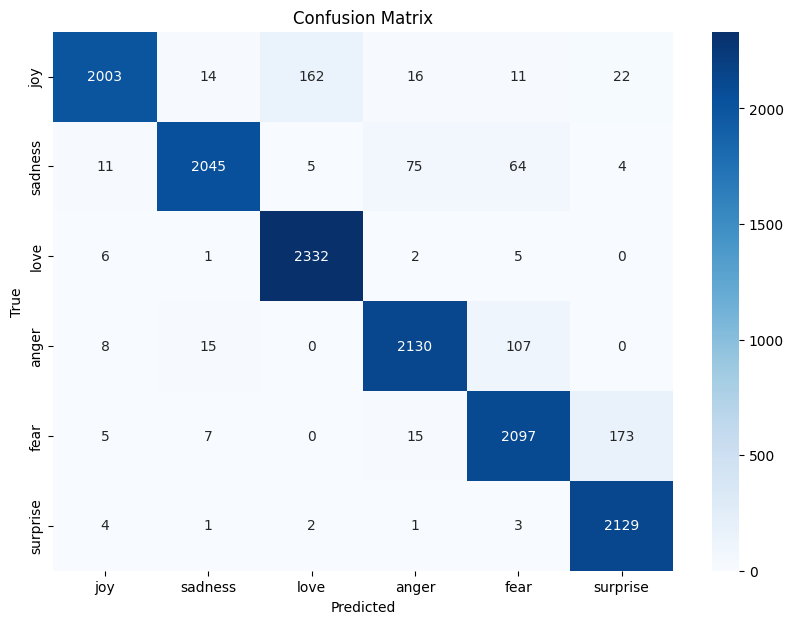

In [ ]:
# Instalar y preparar dependencias
!pip install datasets
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import pickle
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from collections import Counter
import pandas as pd

# Cargar el dataset sin divisiones predefinidas
dataset = load_dataset("dair-ai/emotion", "unsplit")["train"]

# Emociones permitidas y mapeo
allowed_emotions = ["joy", "sadness", "love", "anger", "fear", "surprise"]
label_mapping = {0: 1, 1: 0, 2: 2, 3: 3, 4: 4, 5: 5}

# Filtrar el dataset
def filter_emotions(example):
    return example["label"] in label_mapping.keys()

filtered_dataset = dataset.filter(filter_emotions)

# Convertir el dataset a un DataFrame para facilitar el manejo
data = [{"text": example["text"], "label": example["label"]} for example in filtered_dataset]
df = pd.DataFrame(data)

# Mapear las etiquetas
df["label"] = df["label"].map(label_mapping)

# Distribución inicial de clases
plt.figure(figsize=(8, 5))
sns.countplot(x=df["label"], order=range(len(allowed_emotions)))
plt.title("Distribución inicial de clases")
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.xticks(range(len(allowed_emotions)), allowed_emotions)
plt.show()

# Balancear el dataset
def balance_classes(df):
    min_count = df["label"].value_counts().min()
    balanced_df = df.groupby("label").sample(n=min_count, random_state=42)
    return balanced_df

balanced_df = balance_classes(df)

# Visualización de clases balanceadas
plt.figure(figsize=(8, 5))
sns.countplot(x=balanced_df["label"], order=range(len(allowed_emotions)))
plt.title("Distribución balanceada de clases")
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.xticks(range(len(allowed_emotions)), allowed_emotions)
plt.show()

# Dividir en entrenamiento, validación y prueba
X = balanced_df["text"].values
y = balanced_df["label"].values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% entrenamiento
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% validación, 15% prueba

# Tokenización
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=100)
X_val_pad = tf.keras.preprocessing.sequence.pad_sequences(X_val_seq, maxlen=100)
X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=100)

# Cargar embeddings de GloVe
embedding_dim = 300
glove_path = "glove.6B.300d.txt"
embeddings_index = {}
with open(glove_path, encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = vector

# Crear matriz de embeddings
word_index = tokenizer.word_index
num_words = min(10000, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i < num_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Codificar etiquetas en formato one-hot
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=len(allowed_emotions))
y_val_ohe = tf.keras.utils.to_categorical(y_val, num_classes=len(allowed_emotions))
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=len(allowed_emotions))

# Calcular pesos de clases
class_counts = Counter(y_train)
class_weights = {i: max(class_counts.values()) / count for i, count in class_counts.items()}

# Construir el modelo con regularización adicional
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=100, trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(len(allowed_emotions), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    X_train_pad, y_train_ohe,
    epochs=15,
    batch_size=64,
    validation_data=(X_val_pad, y_val_ohe),
    class_weight=class_weights,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test_pad, y_test_ohe, verbose=2)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

# Guardar el modelo y tokenizer
model.save('emotion_detection_optimized_model_v8.keras')
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Curvas de entrenamiento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Métricas de rendimiento
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_ohe, axis=1)

# Clasificación
print(classification_report(y_true, y_pred_classes, target_names=allowed_emotions))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=allowed_emotions, yticklabels=allowed_emotions, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Cargar el modelo y el tokenizer previamente guardados
model = tf.keras.models.load_model('emotion_detection_optimized_model_v8.keras')

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Función para predecir la emoción de un texto
def predict_emotion(text):
    # Tokenizar el texto de entrada
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=100)

    # Predecir la clase
    prediction = model.predict(padded_seq)

    # Obtener la etiqueta de emoción predicha (la clase con la mayor probabilidad)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Mapear la clase a la emoción correspondiente
    emotion = allowed_emotions[predicted_class]

    return emotion

# Ejemplo de uso: prueba con algunos textos
texts_to_predict_complex = [
    "I can't believe how wonderful the sunset was yesterday. It made me feel so peaceful and connected to everything around me, like the world was in harmony.",
    "After the argument I had with my best friend, I can't stop feeling hurt and disappointed. It feels like nothing will ever be the same between us.",
    "I’m starting to feel a little bit overwhelmed by all the things I have to do. Every time I try to focus on something, another task pops up and it feels impossible to keep up.",
    "Every time I think about the future, I get this feeling of dread. The uncertainty is so overwhelming that I can't stop imagining all the bad things that could happen.",
    "This week has been a roller coaster of emotions. I felt so proud of myself after completing my project, but then my colleague’s comments made me question everything I did.",
    "I don't know what to do with all the mixed feelings I have. There are moments when I feel completely happy and in love with life, and other times when I feel so empty and lost.",
    "The strange sound in the darkness made me feel like something was lurking in the shadows, and I couldn't shake the chill running down my spine.",
    "When she looked into my eyes, I felt such a deep connection that it seemed like time stood still; her smile filled me with an indescribable happiness.",
    "I love her so much, every time I see her, my heart skips a beat.",
    "I am furious with how things turned out, and I can't stop feeling angry about it.",
    "When I see her smile, everything feels right, and I can't stop feeling so happy to be with her.",
    "I cherish every moment we spend together, my heart is full of love and joy.",
    "i beleive that i am much more sensitive to other peoples feelings and tend to be more compassionate"

]

# Predicciones
for text in texts_to_predict_complex:
    emotion = predict_emotion(text)
    print(f"Text: {text}\nPredicted Emotion: {emotion}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Text: I can't believe how wonderful the sunset was yesterday. It made me feel so peaceful and connected to everything around me, like the world was in harmony.
Predicted Emotion: joy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Text: After the argument I had with my best friend, I can't stop feeling hurt and disappointed. It feels like nothing will ever be the same between us.
Predicted Emotion: sadness

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Text: I’m starting to feel a little bit overwhelmed by all the things I have to do. Every time I try to focus on something, another task pops up and it feels impossible to keep up.
Predicted Emotion: surprise

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Text: Every time I think about the future, I get this feeling of dread. The uncertainty is so overwhelming that I can't stop imagining all the bad things that could happen.
Predicted Emotion: sadness

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Text: This week has been a roller coa